In [18]:
import graphviz
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
train_data = pd.read_csv('adult.data', names=['age', 
                                               'workclass', 
                                               'fnlwgt', 
                                               'education', 
                                               'education-num',
                                               'marital-status', 
                                               'occupation', 
                                               'relationship', 
                                               'race', 
                                               'sex', 
                                               'capital-gain', 
                                               'capital-loss', 
                                               'hours-per-week', 
                                               'native-country', 
                                               'salary'])

In [4]:
train_data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
15088,53,Private,218311,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,35,United-States,<=50K
24365,31,Local-gov,209103,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,3464,0,45,United-States,<=50K
14851,17,Self-emp-inc,413557,9th,5,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
23208,24,Private,464103,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,50,United-States,<=50K
26033,67,Self-emp-not-inc,217892,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,10605,0,35,United-States,>50K


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
train_data.where(train_data == ' ?').count()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [7]:
train_data = train_data[train_data != ' ?'].dropna()

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  salary          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
X = train_data[['age', 
                'workclass', 
                'fnlwgt', 
                'education',
                'education-num', 
                'marital-status', 
                'occupation', 
                'relationship',
                'race',
                'sex',
                'capital-gain',
                'capital-loss',
                'hours-per-week',
                'native-country']]

y = train_data['salary']

In [10]:
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

# 0: <=50k, 1: >50k
y = y.apply(lambda x: 0 if x == ' <=50K' else 1)
class_names = ['<=50k', '>50k']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) 
print(y_train.shape, y_test.shape)

(21113,) (9049,)


In [87]:
def build_tree(X_train, X_test, y_train, y_test):
    param_grid = [{
             'criterion':['gini', 'entropy'],
             'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
            }]
    
    tree_clf = tree.DecisionTreeClassifier(random_state=1)
    
    gs_clf = GridSearchCV(tree_clf, param_grid, cv=2, n_jobs=12)
    gs_clf.fit(X_train, y_train)
    
    print(gs_clf.best_params_)
    
    y_pred = gs_clf.predict(X_test)
    
    return (classification_report(y_test, y_pred, target_names=class_names, output_dict=True),
            classification_report(y_test, y_pred, target_names=class_names))

In [88]:
%%time
report_dct, report_txt = build_tree(X_train, X_test, y_train, y_test)
print(report_txt)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 6}
              precision    recall  f1-score   support

       <=50k       0.87      0.94      0.90      6742
        >50k       0.78      0.58      0.66      2307

    accuracy                           0.85      9049
   macro avg       0.82      0.76      0.78      9049
weighted avg       0.84      0.85      0.84      9049

CPU times: user 1.35 s, sys: 217 ms, total: 1.56 s
Wall time: 4.74 s


In [110]:
def best_random_forest():
    param_grid = [{
             'n_estimators':[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
             'max_depth':[10, 15, 20, 25, 30, 35, 40], 
             'min_samples_leaf':[1, 2, 3, 4, 5], 
            }]

    clf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, scoring='accuracy', verbose=100, n_jobs=12)
    clf.fit(X_train, y_train)

    print(clf.best_params_)

    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=class_names))

In [111]:
%%time
best_random_forest()

Fitting 5 folds for each of 385 candidates, totalling 1925 fits
{'max_depth': 35, 'min_samples_leaf': 2, 'n_estimators': 110}
              precision    recall  f1-score   support

       <=50k       0.88      0.94      0.91      6742
        >50k       0.79      0.61      0.69      2307

    accuracy                           0.86      9049
   macro avg       0.83      0.78      0.80      9049
weighted avg       0.85      0.86      0.85      9049

CPU times: user 9.92 s, sys: 1.36 s, total: 11.3 s
Wall time: 7min 43s


In [115]:
def best_gradient_boosting():
    param_grid = [{
             'n_estimators':[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
             'learning_rate':[0.1, 0.5, 1.0],
             'max_depth':[10, 15, 20, 25, 30, 35, 40], 
             'min_samples_leaf':[1, 2, 3, 4, 5], 
            }]

    clf = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, scoring='accuracy', verbose=100, n_jobs=12)
    clf.fit(X_train, y_train)

    print(clf.best_params_)

    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=class_names))

In [116]:
%%time
best_gradient_boosting()

Fitting 5 folds for each of 1155 candidates, totalling 5775 fits
{'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 70}
              precision    recall  f1-score   support

       <=50k       0.89      0.94      0.91      6742
        >50k       0.78      0.65      0.71      2307

    accuracy                           0.86      9049
   macro avg       0.83      0.79      0.81      9049
weighted avg       0.86      0.86      0.86      9049

CPU times: user 27.7 s, sys: 4.09 s, total: 31.8 s
Wall time: 5h 30min 49s


In [29]:
def build_random_forest(n_estimators):
    clf = RandomForestClassifier(n_estimators=n_estimators, 
                                 max_depth=35, 
                                 min_samples_leaf=2, 
                                 random_state=1)
    clf = ClassificationReport(clf, classes=class_names)
    
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print(f'Accuracy {round(acc, 5)} with n_estimators = {n_estimators}')
    clf.show()
    print('-----------------------------------------------------------------')

In [31]:
def build_gradient_boosting(n_estimators):
    clf = GradientBoostingClassifier(n_estimators=n_estimators, 
                                 max_depth=10, 
                                 min_samples_leaf=2, 
                                 learning_rate=0.1,
                                 random_state=1)
    clf = ClassificationReport(clf, classes=class_names)
    
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print(f'Accuracy {round(acc, 5)} with n_estimators = {n_estimators}')
    clf.show()
    print('-----------------------------------------------------------------')

Accuracy 0.85634 with n_estimators = 50


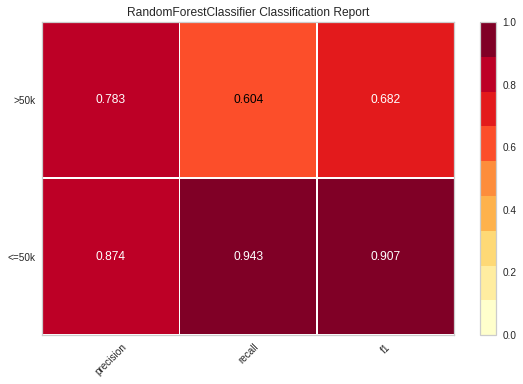

-----------------------------------------------------------------
Accuracy 0.85634 with n_estimators = 60


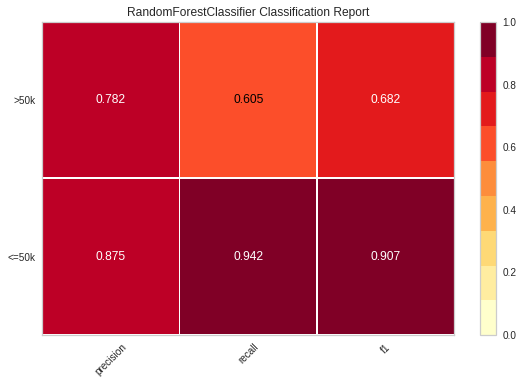

-----------------------------------------------------------------
Accuracy 0.85567 with n_estimators = 70


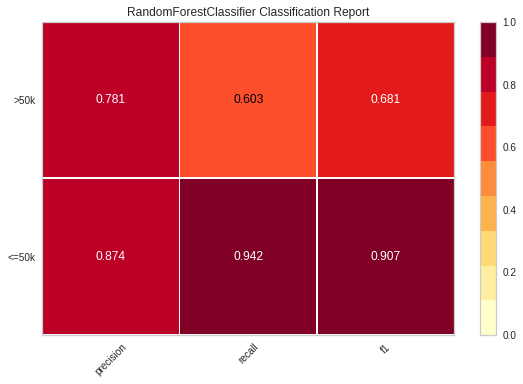

-----------------------------------------------------------------
Accuracy 0.857 with n_estimators = 80


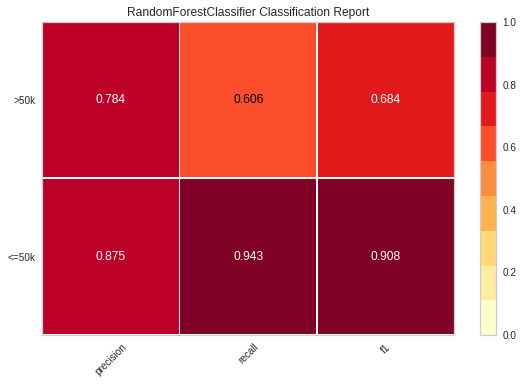

-----------------------------------------------------------------
Accuracy 0.85711 with n_estimators = 90


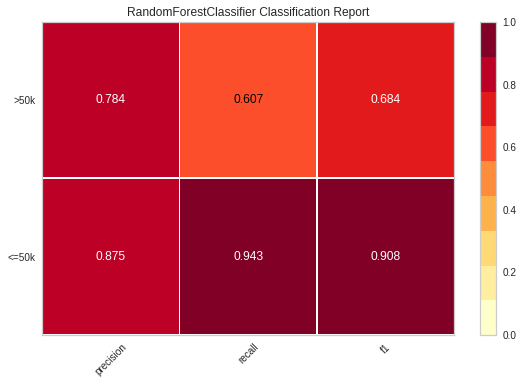

-----------------------------------------------------------------
Accuracy 0.85645 with n_estimators = 100


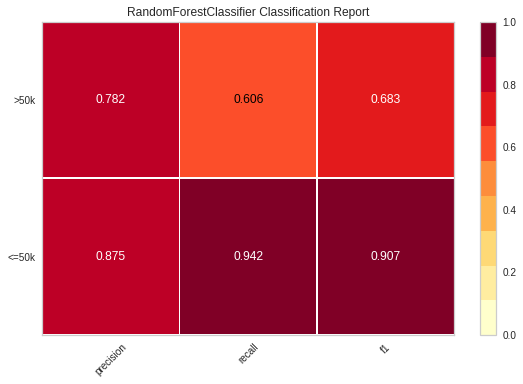

-----------------------------------------------------------------


In [30]:
for i in range(50, 110, 10):
    build_random_forest(i)

Accuracy 0.86242 with n_estimators = 50


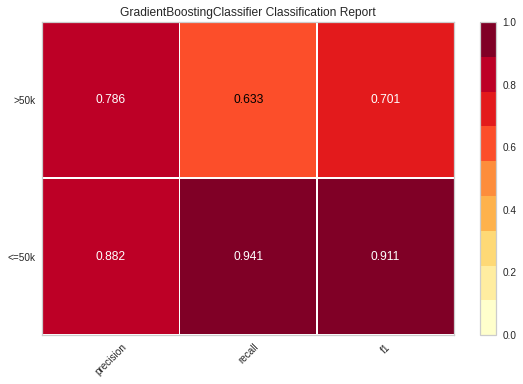

-----------------------------------------------------------------
Accuracy 0.86308 with n_estimators = 60


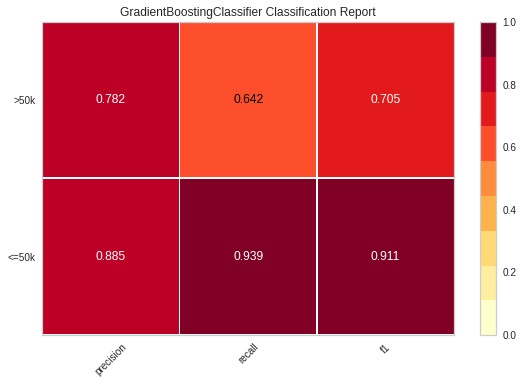

-----------------------------------------------------------------
Accuracy 0.86275 with n_estimators = 70


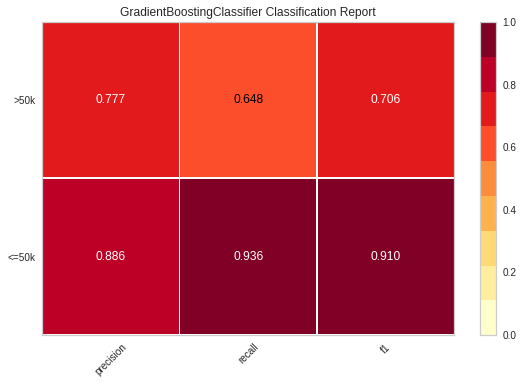

-----------------------------------------------------------------
Accuracy 0.86452 with n_estimators = 80


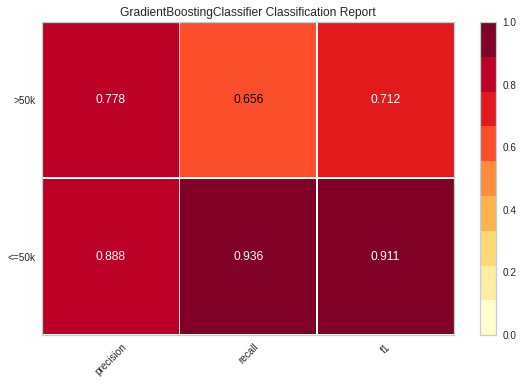

-----------------------------------------------------------------
Accuracy 0.86363 with n_estimators = 90


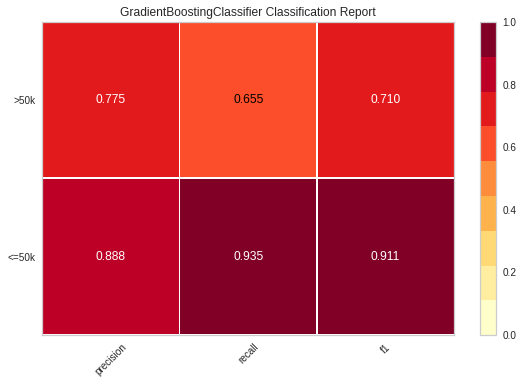

-----------------------------------------------------------------
Accuracy 0.86319 with n_estimators = 100


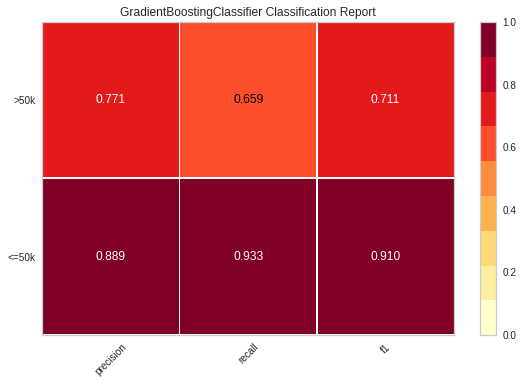

-----------------------------------------------------------------


In [32]:
for i in range(50, 110, 10):
    build_gradient_boosting(i)